# Tesla (TSLA) Stock Price prediction using Facebook Prophet 

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [4]:
pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [5]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 7.0 MB/s eta 0:00:00


In [8]:
pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [2]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default="colab"

## Importing the Dataset & Exploring it

In [5]:
df= pd.read_csv("/content/TSLA.csv")

In [6]:
df #read_csv function from pandas

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [9]:
px.area(df,x="Date",y="Close")

In [10]:
px.area(df, x="Date", y="Volume")

In [11]:
px.bar(df,y="Volume")

In [12]:
px.box(df, y="Close")

# Understanding Facebook Prophet

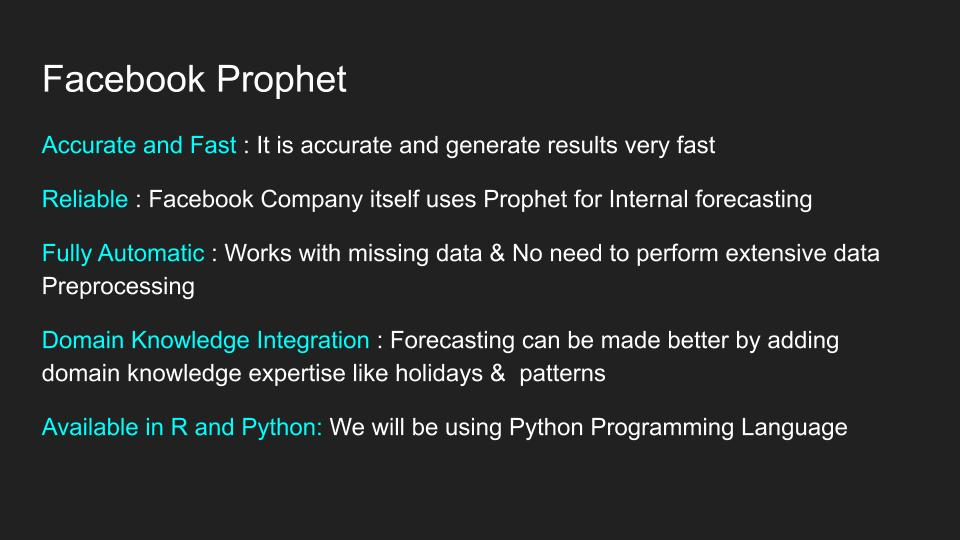

## Data Preperation

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [14]:
columns=['Date',"Close"] 
ndf=pd.DataFrame(df, columns=columns)
print(ndf)

           Date       Close
0    2020-03-16   89.014000
1    2020-03-17   86.040001
2    2020-03-18   72.244003
3    2020-03-19   85.528000
4    2020-03-20   85.505997
..          ...         ...
246  2021-03-08  563.000000
247  2021-03-09  673.580017
248  2021-03-10  668.059998
249  2021-03-11  699.599976
250  2021-03-12  693.729980

[251 rows x 2 columns]


In [15]:
prophet_df=ndf.rename(columns={"Date":'ds', "Close":'y'})
print(prophet_df)

             ds           y
0    2020-03-16   89.014000
1    2020-03-17   86.040001
2    2020-03-18   72.244003
3    2020-03-19   85.528000
4    2020-03-20   85.505997
..          ...         ...
246  2021-03-08  563.000000
247  2021-03-09  673.580017
248  2021-03-10  668.059998
249  2021-03-11  699.599976
250  2021-03-12  693.729980

[251 rows x 2 columns]


## Creating Facebook Prophet Model

In [16]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81ukdyon/68zma5x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp81ukdyon/ztt7l17m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98423', 'data', 'file=/tmp/tmp81ukdyon/68zma5x_.json', 'init=/tmp/tmp81ukdyon/ztt7l17m.json', 'output', 'file=/tmp/tmp81ukdyon/prophet_model7q0x6bg2/prophet_model-20230531055424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [17]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)
print(forecast)

            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2020-03-16   65.599460  -27.919685   149.628532    65.599460    65.599460   
1   2020-03-17   67.394950  -24.150669   144.743738    67.394950    67.394950   
2   2020-03-18   69.190441  -18.625321   145.146452    69.190441    69.190441   
3   2020-03-19   70.985932  -20.369971   155.306279    70.985932    70.985932   
4   2020-03-20   72.781423  -18.530746   148.753436    72.781423    72.781423   
..         ...         ...         ...          ...          ...          ...   
276 2021-04-07  900.291503  813.706907   974.452100   899.230458   901.507950   
277 2021-04-08  902.748588  813.437958   993.703191   901.596180   904.023590   
278 2021-04-09  905.205673  810.056130   990.514986   903.956200   906.556031   
279 2021-04-10  907.662758  832.031623  1005.639464   906.337546   909.069434   
280 2021-04-11  910.119844  840.260393  1010.251172   908.693488   911.636043   

     additive_terms  additi

In [18]:
px.line(forecast ,x="ds",y="yhat")

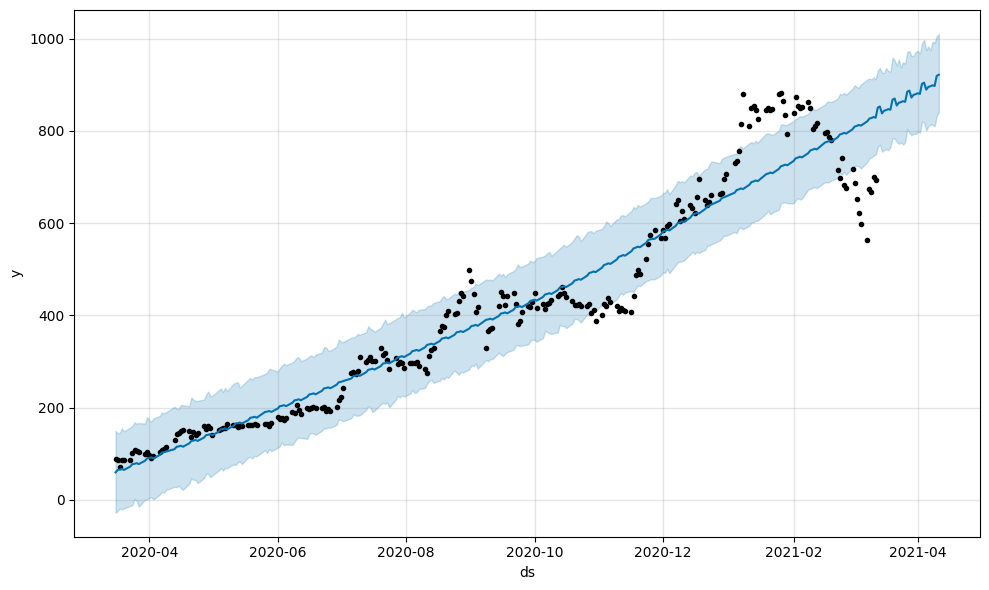

In [19]:
figure=m.plot(forecast,xlabel="ds",ylabel="y")

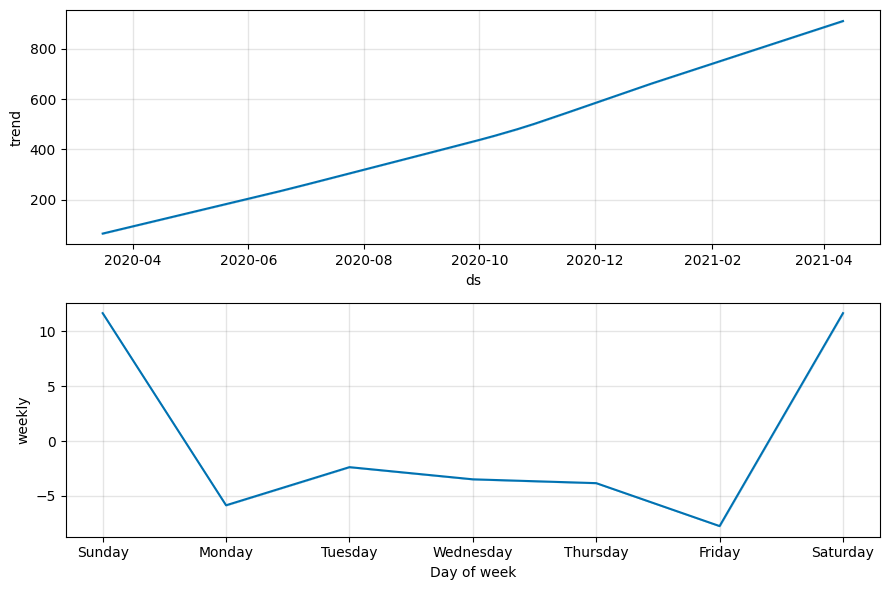

In [20]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [22]:
from google.colab import files
forecast.to_csv("forecast.csv")
files.download("forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>